In [5]:
import pandas as pd
data=pd.read_csv("C:/Users/hp/Downloads/marks.csv")
data

,Attendance,Marks
0,90,87
1,45,40
2,55,52
3,35,28
4,49,45
5,65,63
6,38,35
7,76,74
8,83,80
9,58,55


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Attendance  20 non-null     int64
 1   Marks       20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [6]:
data.isnull().sum()


Attendance    0
Marks         0
dtype: int64

In [7]:
x=data[["Attendance"]]
y=data["Marks"]
print(x.shape)
print(y.shape)

(20, 1)
(20,)


In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [9]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    


In [10]:
from sklearn.ensemble import RandomForestRegressor 
model= RandomForestRegressor(n_estimators= 10)  
model.fit(x_train, y_train)  
y_pred= model.predict(x_test) 
y_pred

array([46.2, 46.2, 73.1, 79.7, 88.4])

In [11]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

0.9642235609103079

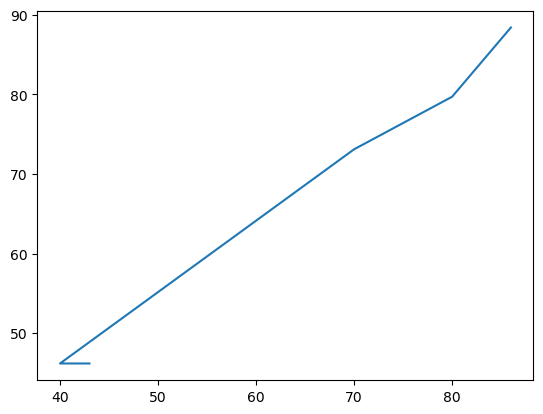

In [12]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred)

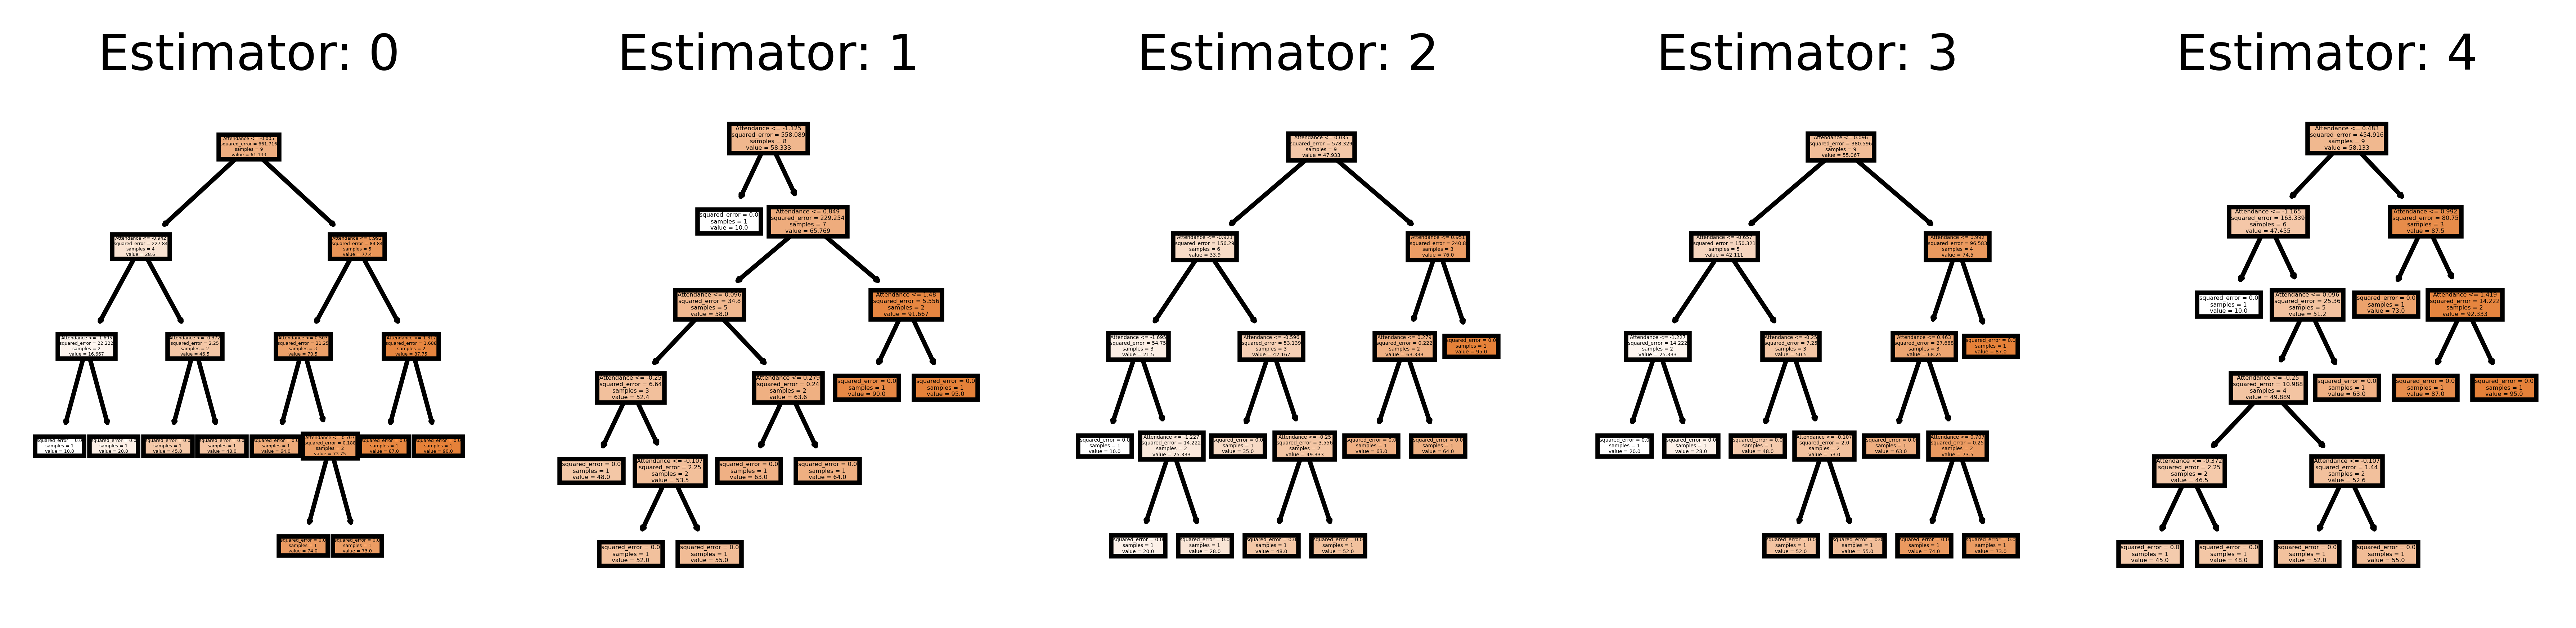

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=["Attendance"]
cn=["Marks"]
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

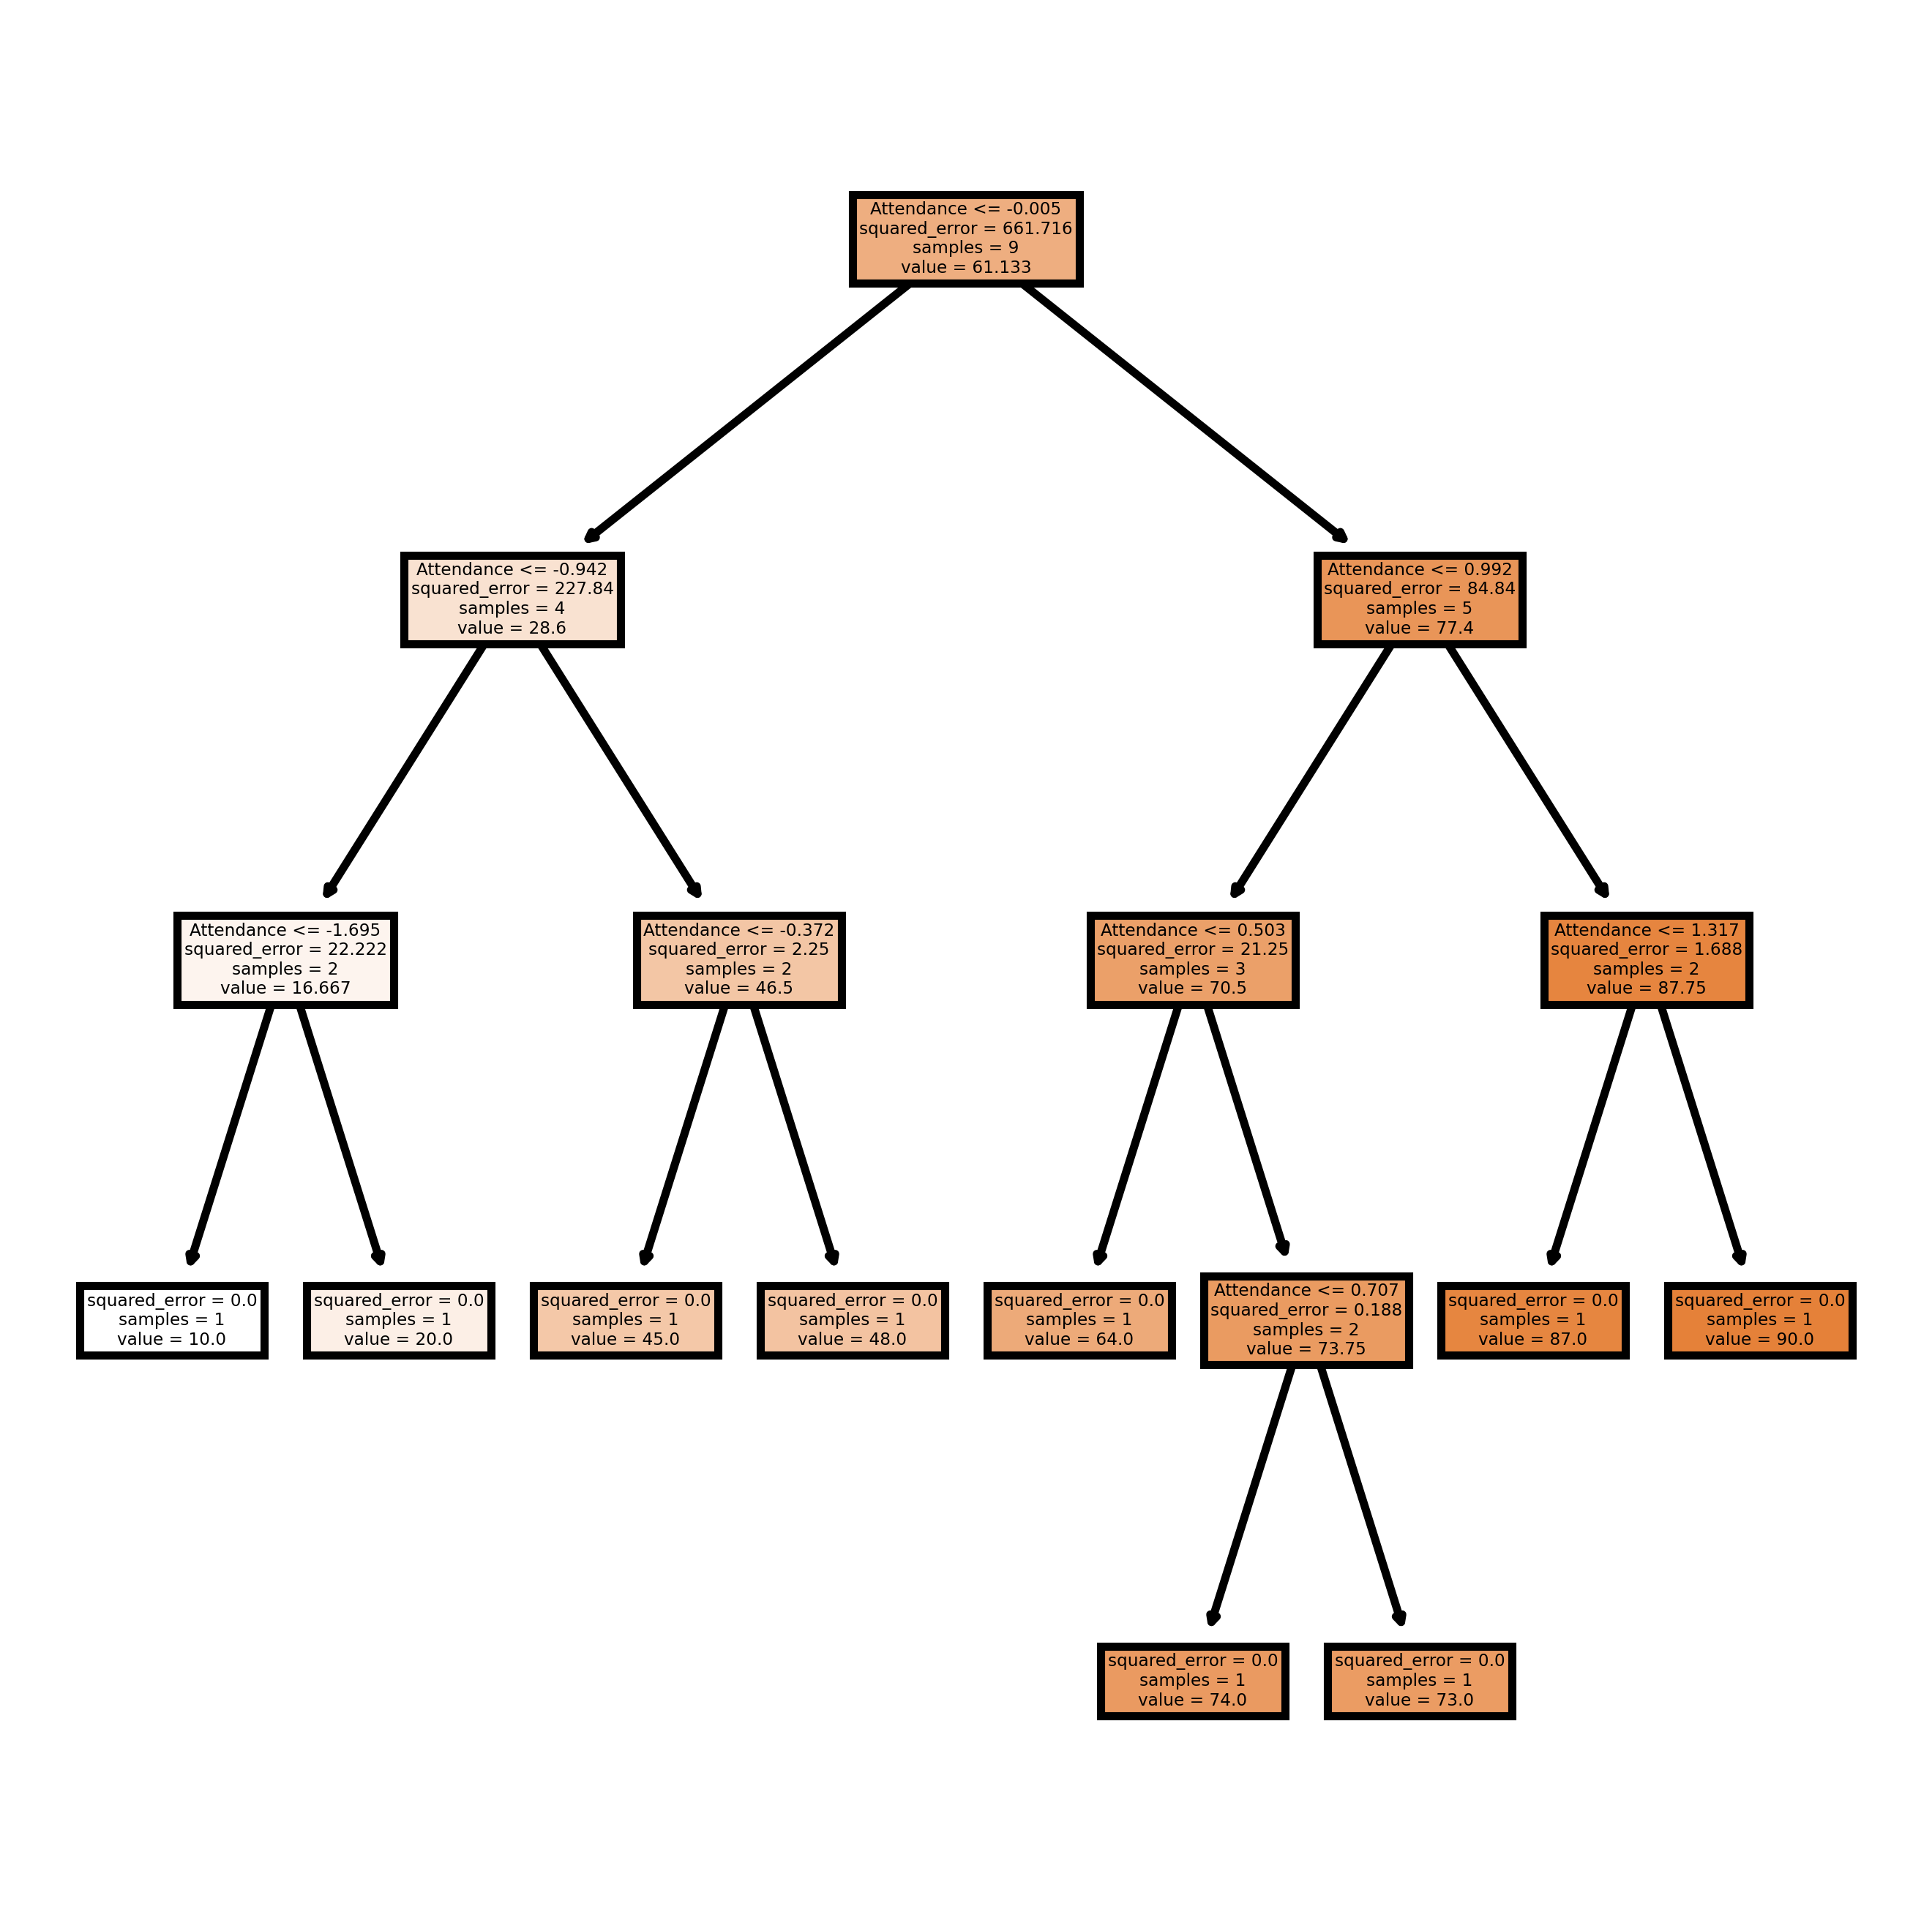

In [14]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')